# Sales Forecasting and Analysis using Superstore Dataset

Retail businesses need to anticipate sales trends to optimize inventory, staffing, and promotions. The goal of this project is to forecast monthly sales and analyze key drivers like product category, region, and customer segment, so business decisions can be data-driven.

## 01. Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from prophet import Prophet
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import MaxNLocator
from statsmodels.tsa.arima.model import ARIMA
import warnings

## 02. Load and Preview The Dataset

In [21]:
#Load the dataset
df= pd.read_csv("C:/Users/YASIRU/Desktop/SuperStore Sales EDA/Sample - Superstore_2.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## 03. Basic Information about The Dataset

### Count of rows and columns of the dataset

In [25]:
# Count of rows and columns of the dataset
print ("Shape of the dataset:", df.shape)

Shape of the dataset: (9994, 21)


### Column names 

In [28]:
# Column names 
columns = (df.columns.tolist())
print("Columns of the dataset are:",columns)

Columns of the dataset are: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


### Data types and non-null counts

In [31]:
# Data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

### Summary statistics of numerical columns

In [34]:
# Summary statistics of numerical columns
print(df.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


### Count of unique values in a column

In [37]:
# Count of unique values in a column
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

## 04. Clean and Prepare the Dataset

### Check the missing values

In [41]:
# Check the missing values
print("Missing values:", df.isnull().sum())

Missing values: Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


### Check duplicates

In [44]:
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


### Convert columns into correct datatypes

In [47]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

### Strip extra spaces and capitalize words in all text columns

In [50]:
text_columns = df.select_dtypes(include='object').columns
for col in text_columns:
    df[col] = df[col].str.strip().str.title()

In [52]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Count of unique values in a column after fixing inconsistencies

In [55]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

### Create new columns "Shipping Time", "Order Year", "Order Month"

In [58]:
df['Shipping Time(Days)'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Row ID               9994 non-null   int64         
 1   Order ID             9994 non-null   object        
 2   Order Date           9994 non-null   datetime64[ns]
 3   Ship Date            9994 non-null   datetime64[ns]
 4   Ship Mode            9994 non-null   object        
 5   Customer ID          9994 non-null   object        
 6   Customer Name        9994 non-null   object        
 7   Segment              9994 non-null   object        
 8   Country              9994 non-null   object        
 9   City                 9994 non-null   object        
 10  State                9994 non-null   object        
 11  Postal Code          9994 non-null   int64         
 12  Region               9994 non-null   object        
 13  Product ID           9994 non-nul

In [62]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Time(Days),Order Year,Order Month
0,1,Ca-2016-152156,2016-11-08,2016-11-11,Second Class,Cg-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3,2016,11
1,2,Ca-2016-152156,2016-11-08,2016-11-11,Second Class,Cg-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3,2016,11
2,3,Ca-2016-138688,2016-06-12,2016-06-16,Second Class,Dv-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels For Typewriters B...,14.6200,2,0.00,6.8714,4,2016,6
3,4,Us-2015-108966,2015-10-11,2015-10-18,Standard Class,So-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford Cr4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7,2015,10
4,5,Us-2015-108966,2015-10-11,2015-10-18,Standard Class,So-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,Ca-2014-110422,2014-01-21,2014-01-23,Second Class,Tb-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2,2014,1
9990,9991,Ca-2017-121258,2017-02-26,2017-03-03,Standard Class,Db-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-Re Series Chair Mats For Low Pile Car...,91.9600,2,0.00,15.6332,5,2017,2
9991,9992,Ca-2017-121258,2017-02-26,2017-03-03,Standard Class,Db-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57I Voip Phone,258.5760,2,0.20,19.3932,5,2017,2
9992,9993,Ca-2017-121258,2017-02-26,2017-03-03,Standard Class,Db-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It'S Hot Message Books With Stickers, 2 3/4"" X 5""",29.6000,4,0.00,13.3200,5,2017,2


### Saved the cleaned dataset

In [65]:
df.to_csv("Superstore_Sales.csv", index=False)

## 05. Exploratory Data Analysis (EDA)

### Monthly Sales

### statistical summary of Sales

In [70]:
# List the columns you want
columns = ['Sales']
# Get statistical summary for these columns
df[columns].describe()

,Sales
count,9994.000000
mean,229.858001
std,623.245101
min,0.444000
25%,17.280000
50%,54.490000
75%,209.940000
max,22638.480000


### Box PLot for Sales Distribution

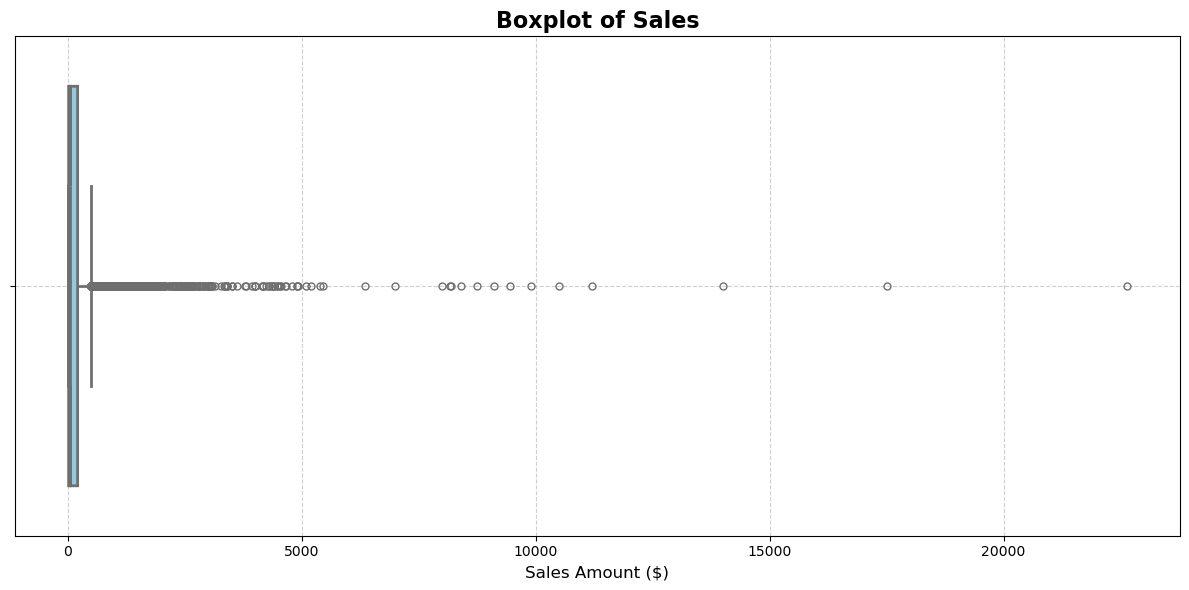

In [73]:
plt.figure(figsize=(12,6))

sns.boxplot(
    x=df['Sales'],
    color='skyblue',        # fill color
    linewidth=2,            # thickness of box
    fliersize=5,            # size of outlier markers
    notch=True              # adds notch to show confidence interval around median
)

plt.title("Boxplot of Sales", fontsize=16, fontweight='bold')
plt.xlabel("Sales Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Histrogram for Sales Distribution

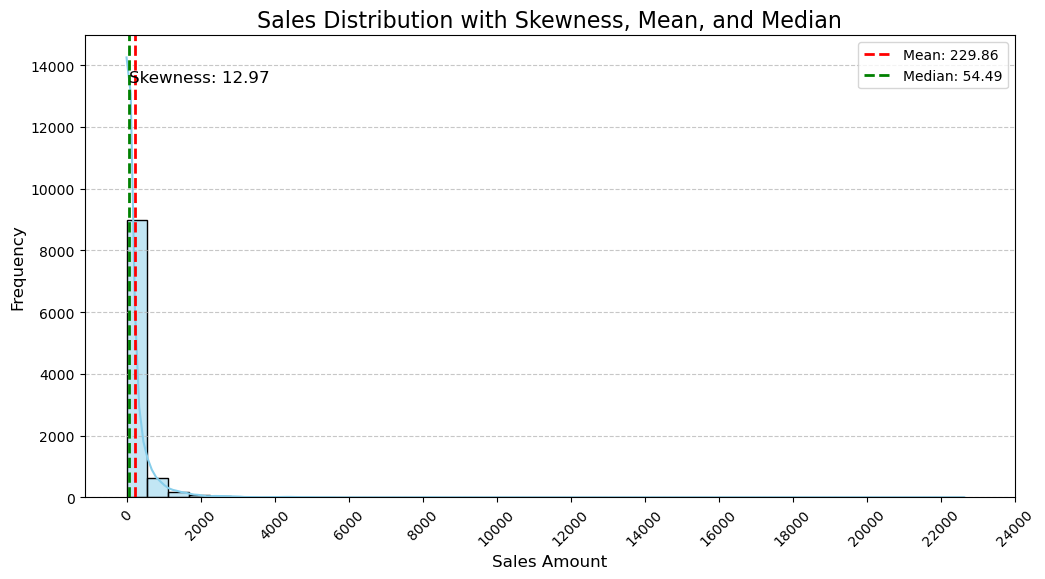

In [75]:
# Calculate statistics
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
skewness = df['Sales'].skew()

plt.figure(figsize=(12,6))

# Histogram with density curve
sns.histplot(df['Sales'], bins=40, kde=True, color='skyblue', edgecolor='black')

# Add vertical lines for mean and median
plt.axvline(mean_sales, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_sales:.2f}')
plt.axvline(median_sales, color='green', linestyle='--', linewidth=2, label=f'Median: {median_sales:.2f}')

# Add text annotation for skewness
plt.text(x=median_sales, y=plt.gca().get_ylim()[1]*0.9, s=f'Skewness: {skewness:.2f}', fontsize=12, color='black')

# Customize x-axis ticks
x_min = 0
x_max = df['Sales'].max()
x_step = 2000  # smaller step for more tick marks
plt.xticks(np.arange(x_min, x_max + x_step, x_step), rotation=45)

# Titles and labels
plt.title("Sales Distribution with Skewness, Mean, and Median", fontsize=16)
plt.xlabel("Sales Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

The sales distribution is right-skewed, meaning most orders are low-value with a few very high-value sales. To understand trends and seasonality, I aggregated sales by month and plotted a line chart. This revealed an upward trend and recurring seasonal peaks, which are critical for accurate forecasting.

### Aggregate monthly sales by year and month

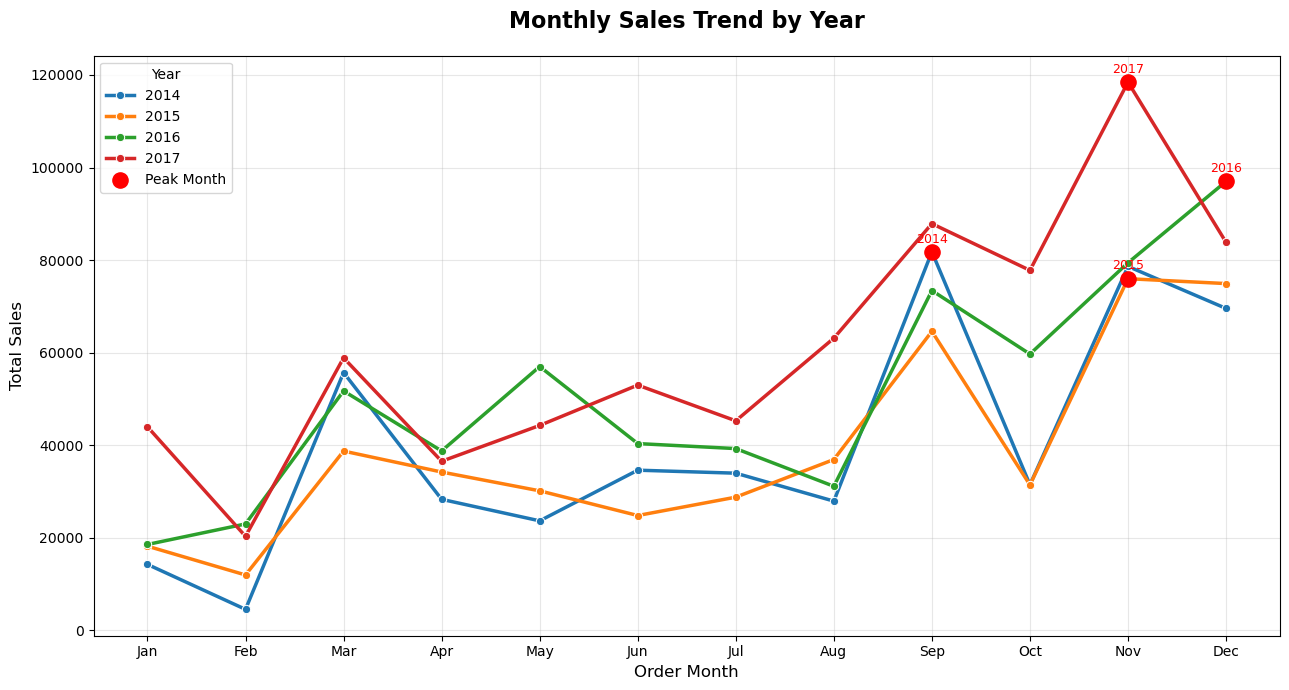

In [80]:
# === Step 1: Aggregate monthly sales by year and month ===
# Group the data by 'Order Year' and 'Order Month' and sum up sales
monthly_sales = df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()

# === Step 2: Sort the data chronologically ===
# Ensures months are in order within each year for proper plotting
monthly_sales = monthly_sales.sort_values(['Order Year', 'Order Month'])

# === Step 3: Calculate 3-month rolling average per year ===
# Smooths the sales trend to make patterns more visible
monthly_sales['Rolling'] = monthly_sales.groupby('Order Year')['Sales'] \
                                        .transform(lambda x: x.rolling(3, min_periods=1).mean())

# === Step 4: Identify peak sales month for each year ===
# Finds the month with the maximum sales in each year
peak_sales = monthly_sales.loc[monthly_sales.groupby('Order Year')['Sales'].idxmax()]

# === Step 5: Create the main line chart ===
plt.figure(figsize=(13, 7))  # Set figure size for better readability
sns.lineplot(
    data=monthly_sales,
    x='Order Month',   # x-axis = month number (1-12)
    y='Sales',         # y-axis = total sales
    hue='Order Year',  # Separate line for each year
    marker='o',        # Draw a circle marker at each month
    linewidth=2.5,     # Line thickness
    palette='tab10'    # Color palette for different years
)

# === Step 6: Highlight the peak sales months ===
plt.scatter(
    peak_sales['Order Month'],  # x = peak month
    peak_sales['Sales'],        # y = peak sales value
    color='red',                # red color to stand out
    s=120,                      # size of the marker
    zorder=5,                   # bring marker on top of the lines
    label='Peak Month'          # label for legend
)

# === Step 7: Annotate the peak months with the year ===
for _, row in peak_sales.iterrows():
    plt.text(
        row['Order Month'],        # x-coordinate
        row['Sales'] + 2000,       # y-coordinate slightly above peak
        f"{int(row['Order Year'])}", # text = year of the peak
        color='red',
        fontsize=9,
        ha='center'                # horizontally center the text
    )

# === Step 8: Customize chart appearance ===
plt.title('Monthly Sales Trend by Year', fontsize=16, fontweight='bold', pad=20)  # Chart title
plt.xlabel('Order Month', fontsize=12)   # x-axis label
plt.ylabel('Total Sales', fontsize=12)   # y-axis label

# Replace numeric months (1-12) with abbreviated month names
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# Add legend and grid
plt.legend(title='Year', loc='upper left')
plt.grid(True, alpha=0.3)  # light grid for better readability

# Adjust layout to prevent clipping
plt.tight_layout()

# Save figure as PNG
plt.tight_layout()
plt.savefig("monthly_sales_by_year.png", dpi=300)  # dpi=300 for high quality

# Then display
plt.show()

### Aggregate monthly sales by Category

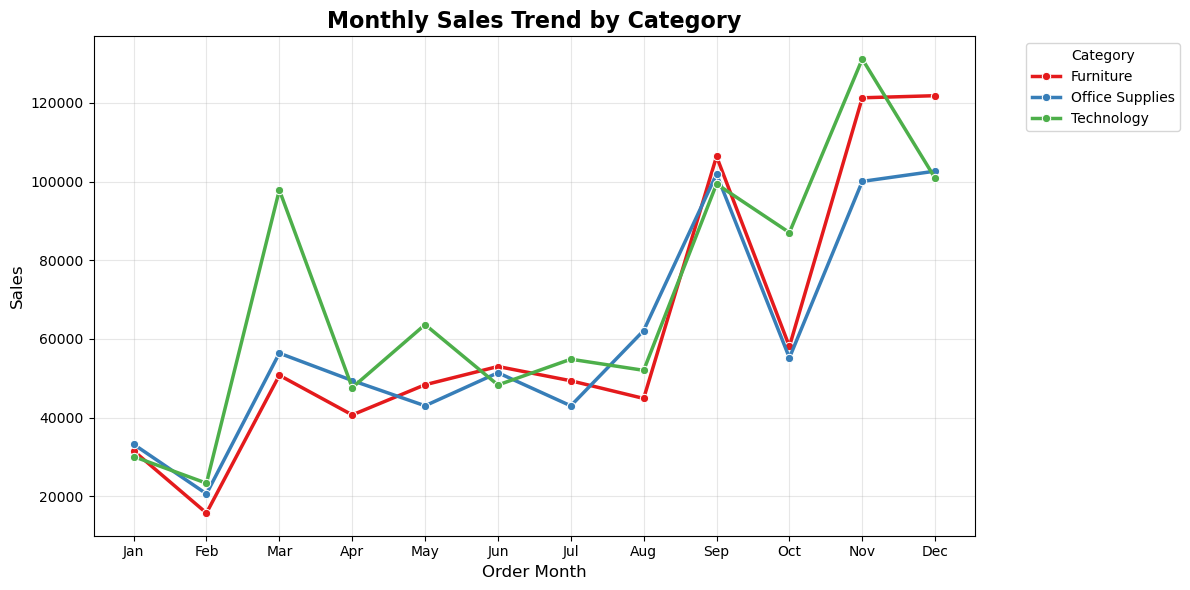

In [82]:
# === Step 1: Aggregate monthly sales by Category ===
# Group data by 'Order Month' and 'Category', summing up sales
monthly_category_sales = df.groupby(['Order Month', 'Category'])['Sales'].sum().reset_index()

# === Step 2: Create the line chart ===
plt.figure(figsize=(12,6))  # Set figure size for readability

sns.lineplot(
    data=monthly_category_sales,
    x='Order Month',   # x-axis = month number (1-12)
    y='Sales',         # y-axis = total sales
    hue='Category',    # separate line for each product category
    marker='o',        # draw a circle marker at each month
    palette='Set1',    # distinct colors for 3 categories
    linewidth=2.5      # thickness of the lines
)

# === Step 3: Customize titles and labels ===
plt.title("Monthly Sales Trend by Category", fontsize=16, fontweight='bold')  # chart title
plt.xlabel("Order Month", fontsize=12)  # x-axis label
plt.ylabel("Sales", fontsize=12)        # y-axis label

# Replace numeric months (1-12) with abbreviated month names
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# === Step 4: Add grid ===
plt.grid(True, alpha=0.3)  # light grid for better readability

# === Step 5: Adjust legend ===
# Move the legend outside the chart to avoid overlapping with lines
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# === Step 6: Layout adjustments ===
plt.tight_layout()  # ensures everything fits without overlap

# Save figure as PNG
plt.tight_layout()
plt.savefig("monthly_sales_by_Category.png", dpi=300)  # dpi=300 for high quality

# Then display
plt.show()

### Aggregate monthly sales by Sub-Category

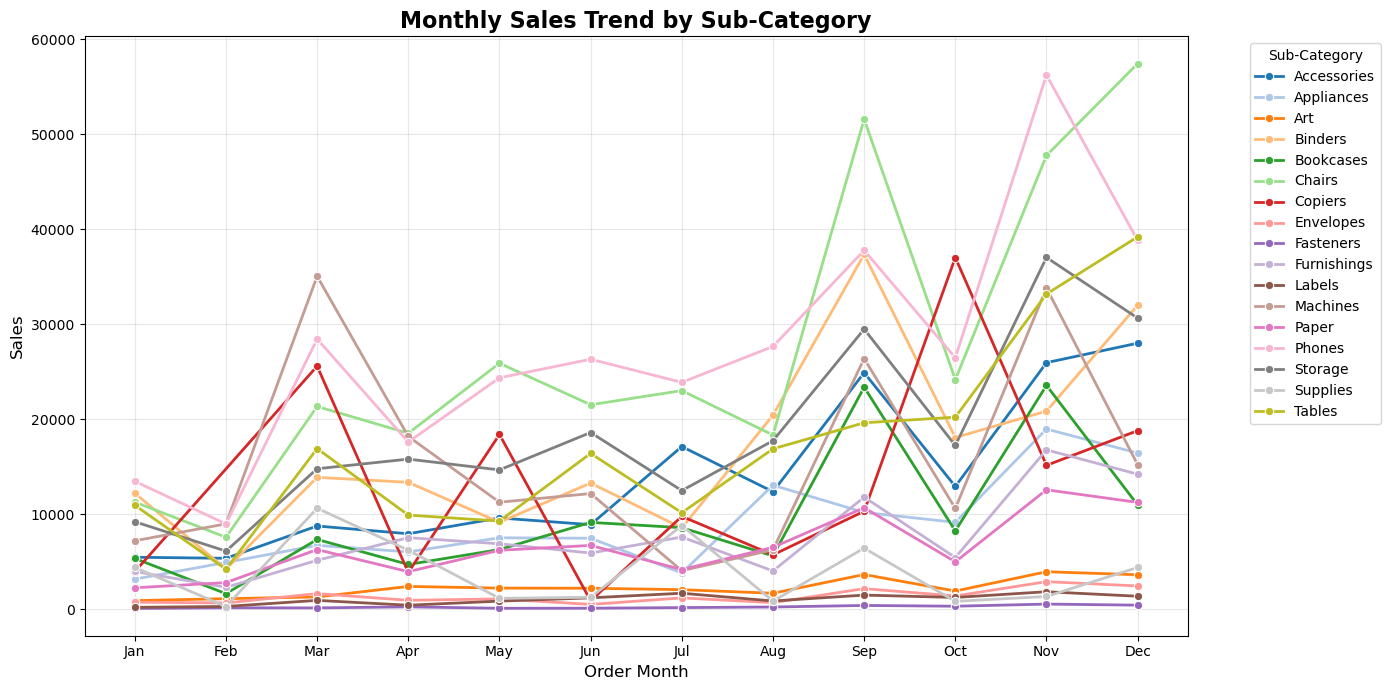

In [85]:
# === Step 1: Aggregate monthly sales by Sub-Category ===
# Group data by 'Order Month' and 'Sub-Category', summing up sales
monthly_subcat_sales = df.groupby(['Order Month', 'Sub-Category'])['Sales'].sum().reset_index()

# === Step 2: Create the line chart ===
plt.figure(figsize=(14,7))  # Set larger figure size for clarity

sns.lineplot(
    data=monthly_subcat_sales,
    x='Order Month',   # x-axis = month number (1-12)
    y='Sales',         # y-axis = total sales
    hue='Sub-Category',# separate line for each sub-category
    marker='o',        # draw a circle marker at each month
    palette='tab20',   # distinct colors for up to 20 sub-categories
    linewidth=2        # thickness of the lines
)

# === Step 3: Customize titles and labels ===
plt.title("Monthly Sales Trend by Sub-Category", fontsize=16, fontweight='bold')  # chart title
plt.xlabel("Order Month", fontsize=12)  # x-axis label
plt.ylabel("Sales", fontsize=12)        # y-axis label

# Replace numeric months (1-12) with abbreviated month names
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# === Step 4: Add grid ===
plt.grid(True, alpha=0.3)  # light grid for better readability

# === Step 5: Adjust legend ===
# Move the legend outside the chart to avoid overlapping with lines
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# === Step 6: Layout adjustments ===
plt.tight_layout()  # ensures everything fits without overlap

# === Step 7: Save figure as PNG ===
plt.savefig("monthly_sales_by_subcategory.png", dpi=300)  # Save high-resolution image

# === Step 8: Show the plot ===
plt.show()


### Aggregate monthly sales by Region

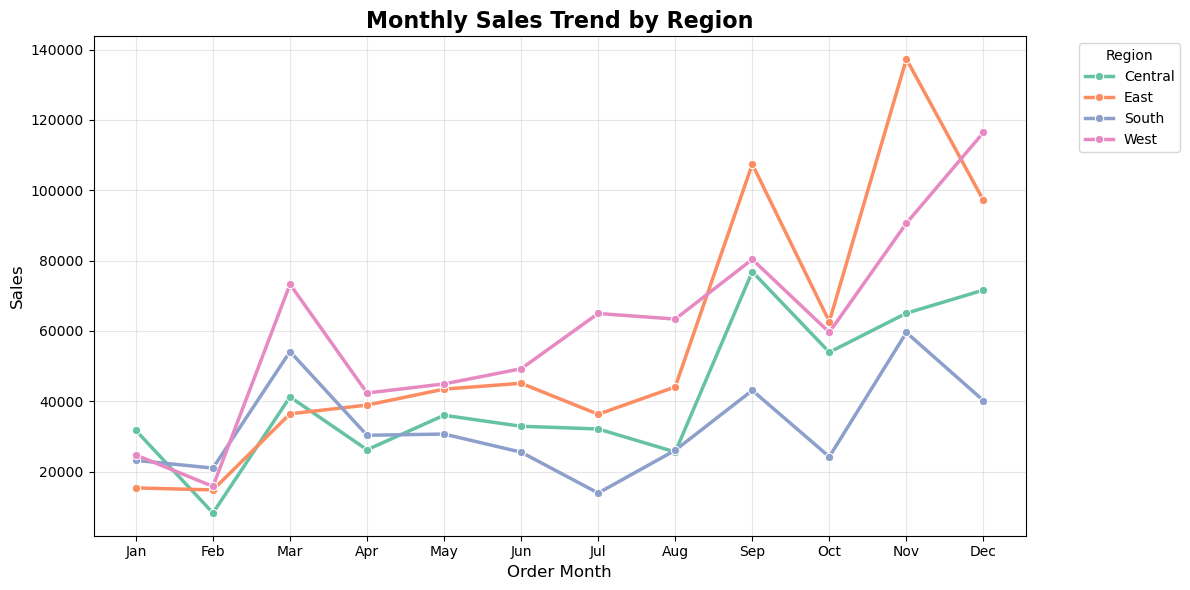

In [88]:
# === Step 1: Aggregate monthly sales by Region ===
# Group data by 'Order Month' and 'Region', summing up sales
monthly_region_sales = df.groupby(['Order Month', 'Region'])['Sales'].sum().reset_index()

# === Step 2: Create the line chart ===
plt.figure(figsize=(12,6))  # Set figure size for readability

sns.lineplot(
    data=monthly_region_sales,
    x='Order Month',   # x-axis = month number (1-12)
    y='Sales',         # y-axis = total sales
    hue='Region',      # separate line for each region
    marker='o',        # draw a circle marker at each month
    palette='Set2',    # distinct colors for 4 regions
    linewidth=2.5      # thickness of the lines
)

# === Step 3: Customize titles and labels ===
plt.title("Monthly Sales Trend by Region", fontsize=16, fontweight='bold')  # chart title
plt.xlabel("Order Month", fontsize=12)  # x-axis label
plt.ylabel("Sales", fontsize=12)        # y-axis label

# Replace numeric months (1-12) with abbreviated month names
plt.xticks(range(1,13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

# === Step 4: Add grid ===
plt.grid(True, alpha=0.3)  # light grid for better readability

# === Step 5: Adjust legend ===
# Move the legend outside the chart to avoid overlapping with lines
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# === Step 6: Layout adjustments ===
plt.tight_layout()  # ensures everything fits without overlap

# === Step 7: Save figure as PNG ===
plt.savefig("monthly_sales_by_region.png", dpi=300)  # Save high-resolution image

# === Step 8: Show the plot ===
plt.show()


### Sales forecast for next 12 months 

23:26:06 - cmdstanpy - INFO - Chain [1] start processing
23:26:08 - cmdstanpy - INFO - Chain [1] done processing


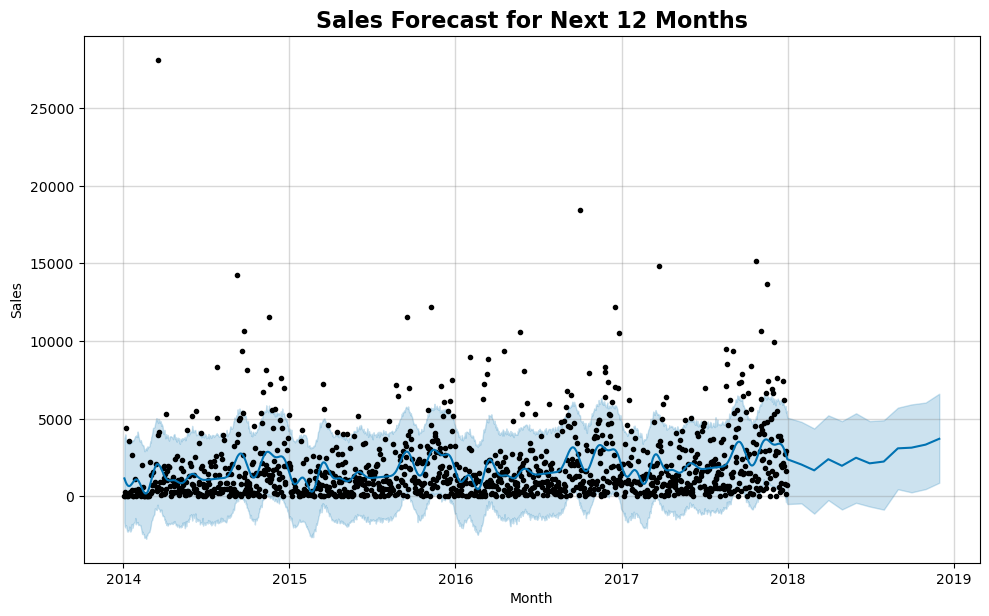

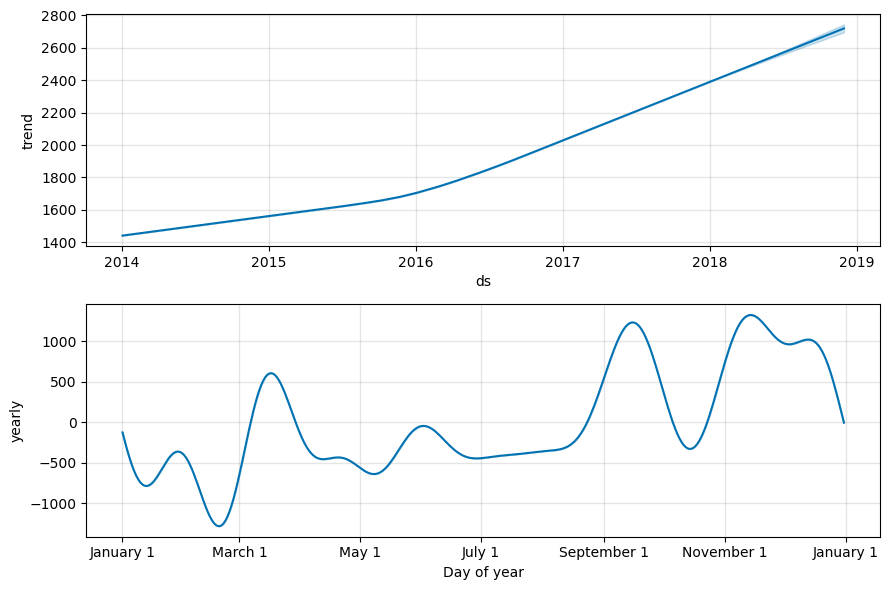

In [92]:
# === Step 1: Suppress FutureWarnings for cleaner output ===
warnings.simplefilter(action='ignore', category=FutureWarning)

# === Step 2: Prepare data for Prophet ===
# Aggregate monthly sales using the datetime column 'Order Date'
df_monthly = df.groupby('Order Date')['Sales'].sum().reset_index()

# Rename columns as required by Prophet: 'ds' for date, 'y' for value
df_monthly.rename(columns={'Order Date':'ds', 'Sales':'y'}, inplace=True)

# === Step 3: Initialize and fit Prophet model ===
# Enable yearly seasonality since sales may vary across months of the year
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_monthly)

# === Step 4: Create future DataFrame for next 12 months ===
# freq='ME' ensures month-end dates
future = model.make_future_dataframe(periods=12, freq='ME')

# === Step 5: Forecast sales ===
forecast = model.predict(future)

# === Step 6: Plot forecast and save correctly ===
fig1 = model.plot(forecast)  # This returns the figure object
plt.title('Sales Forecast for Next 12 Months', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)

# Save the figure using the returned figure object
fig1.savefig("sales_forecast_12_months.png", dpi=300)

plt.show()

# === Step 8: Plot forecast components and save ===
fig2 = model.plot_components(forecast)
fig2.tight_layout()
fig2.savefig("forecast_components.png", dpi=400)
plt.show()

### Aggregate total sales by Category

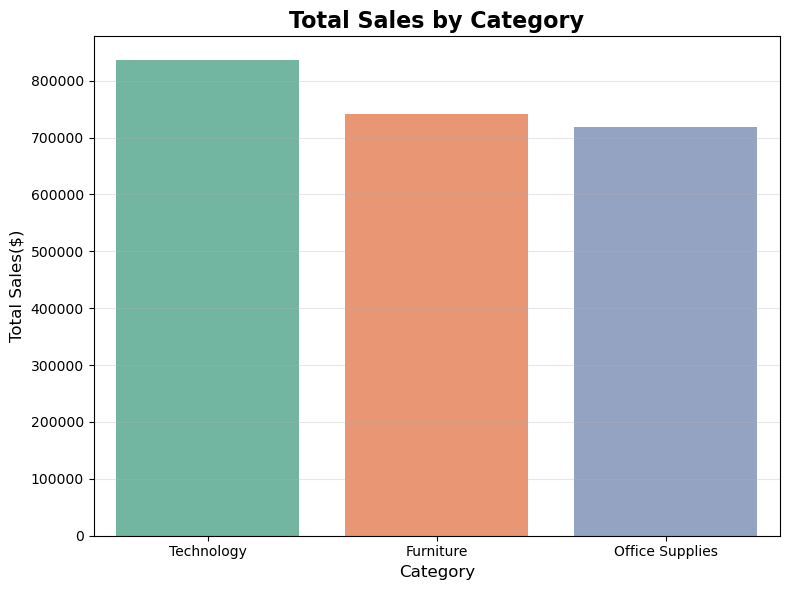

In [94]:
# === Step 1: Aggregate total sales by Category ===
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Sort by sales descending for better visualization
category_sales = category_sales.sort_values('Sales', ascending=False)

# === Step 2: Create bar chart ===
plt.figure(figsize=(8,6))  # smaller figure since only 3 categories
sns.barplot(
    data=category_sales,
    x='Category',
    y='Sales',
    palette='Set2'  # distinct colors for the categories
)

# === Step 3: Customize titles and labels ===
plt.title('Total Sales by Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales($)', fontsize=12)

# Add grid for readability
plt.grid(axis='y', alpha=0.3)

# === Step 4: Save figure as PNG ===
plt.tight_layout()
plt.savefig("total_sales_by_category.png", dpi=300)

# === Step 5: Show plot ===
plt.show()


### Aggregate total sales by Sub-Category

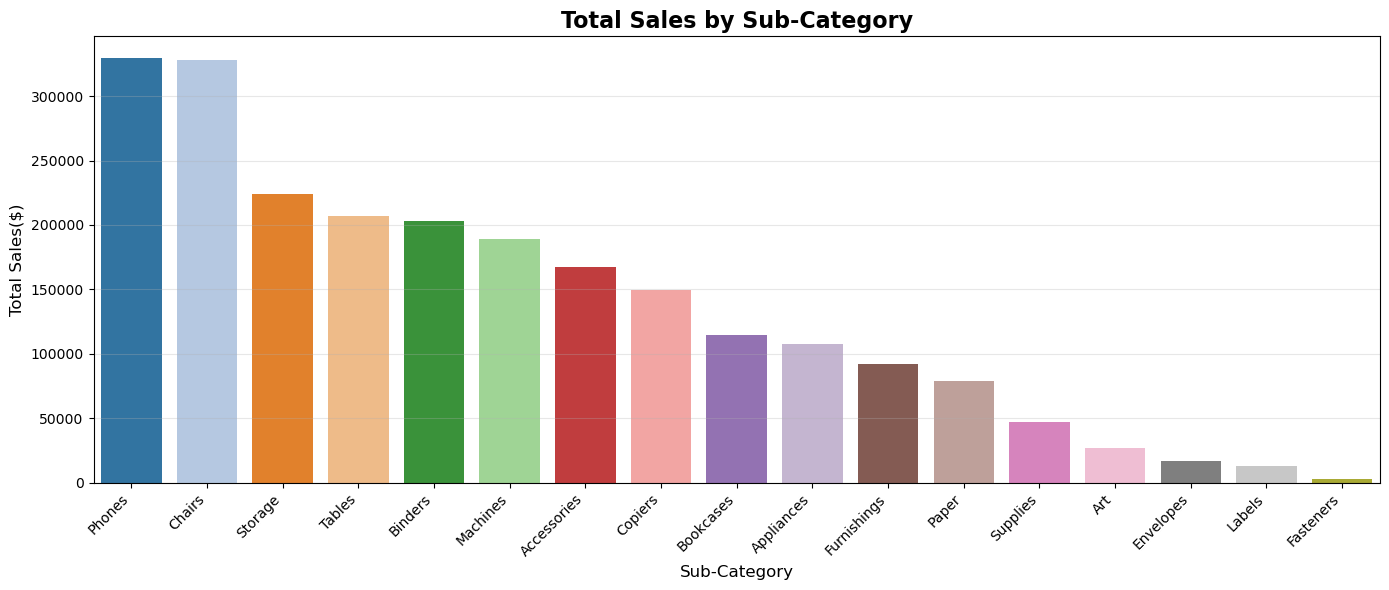

In [97]:
# === Step 1: Aggregate total sales by Sub-Category ===
subcat_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Sort by sales descending for better visualization
subcat_sales = subcat_sales.sort_values('Sales', ascending=False)

# === Step 2: Create bar chart ===
plt.figure(figsize=(14,6))
sns.barplot(
    data=subcat_sales,
    x='Sub-Category',
    y='Sales',
    palette='tab20'  # distinct colors for multiple sub-categories
)

# === Step 3: Customize titles and labels ===
plt.title('Total Sales by Sub-Category', fontsize=16, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# === Step 4: Add grid for readability ===
plt.grid(axis='y', alpha=0.3)

# === Step 5: Save figure as PNG ===
plt.tight_layout()
plt.savefig("total_sales_by_subcategory.png", dpi=300)

# === Step 6: Show plot ===
plt.show()

### Aggregate total sales by Region

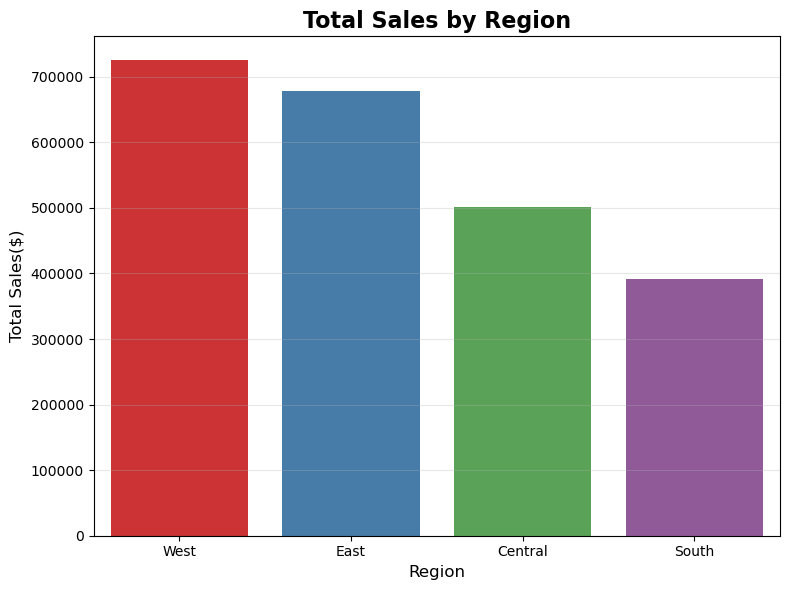

In [100]:
# === Step 1: Aggregate total sales by Region ===
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort by sales descending for better visualization
region_sales = region_sales.sort_values('Sales', ascending=False)

# === Step 2: Create bar chart ===
plt.figure(figsize=(8,6))  # suitable figure size for 4 regions
sns.barplot(
    data=region_sales,
    x='Region',
    y='Sales',
    palette='Set1'  # distinct colors for each region
)

# === Step 3: Customize titles and labels ===
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales($)', fontsize=12)

# Add grid for readability
plt.grid(axis='y', alpha=0.3)

# === Step 4: Save figure as PNG ===
plt.tight_layout()
plt.savefig("total_sales_by_region.png", dpi=300)

# === Step 5: Show plot ===
plt.show()


### Aggregate total sales by Segment

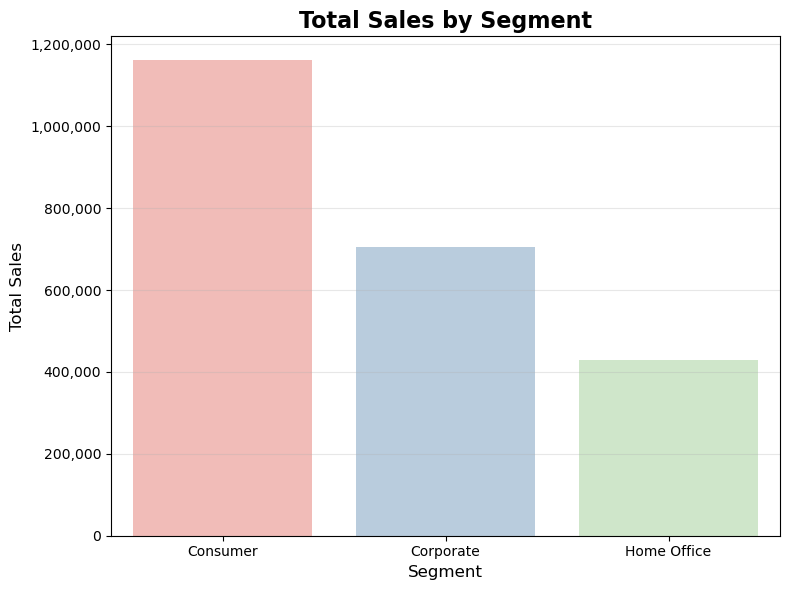

In [103]:
# === Step 1: Aggregate total sales by Segment ===
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

# Sort by sales descending
segment_sales = segment_sales.sort_values('Sales', ascending=False)

# === Step 2: Create bar chart ===
plt.figure(figsize=(8,6))
sns.barplot(
    data=segment_sales,
    x='Segment',
    y='Sales',
    palette='Pastel1'
)

# === Step 3: Titles and labels ===
plt.title('Total Sales by Segment', fontsize=16, fontweight='bold')
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

# === Step 4: Format Y-axis as integers with commas ===
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Add grid
plt.grid(axis='y', alpha=0.3)

# === Step 5: Save figure as PNG ===
plt.tight_layout()
plt.savefig("total_sales_by_segment.png", dpi=300)

# === Step 6: Show plot ===
plt.show()

### Aggregate total sales by State

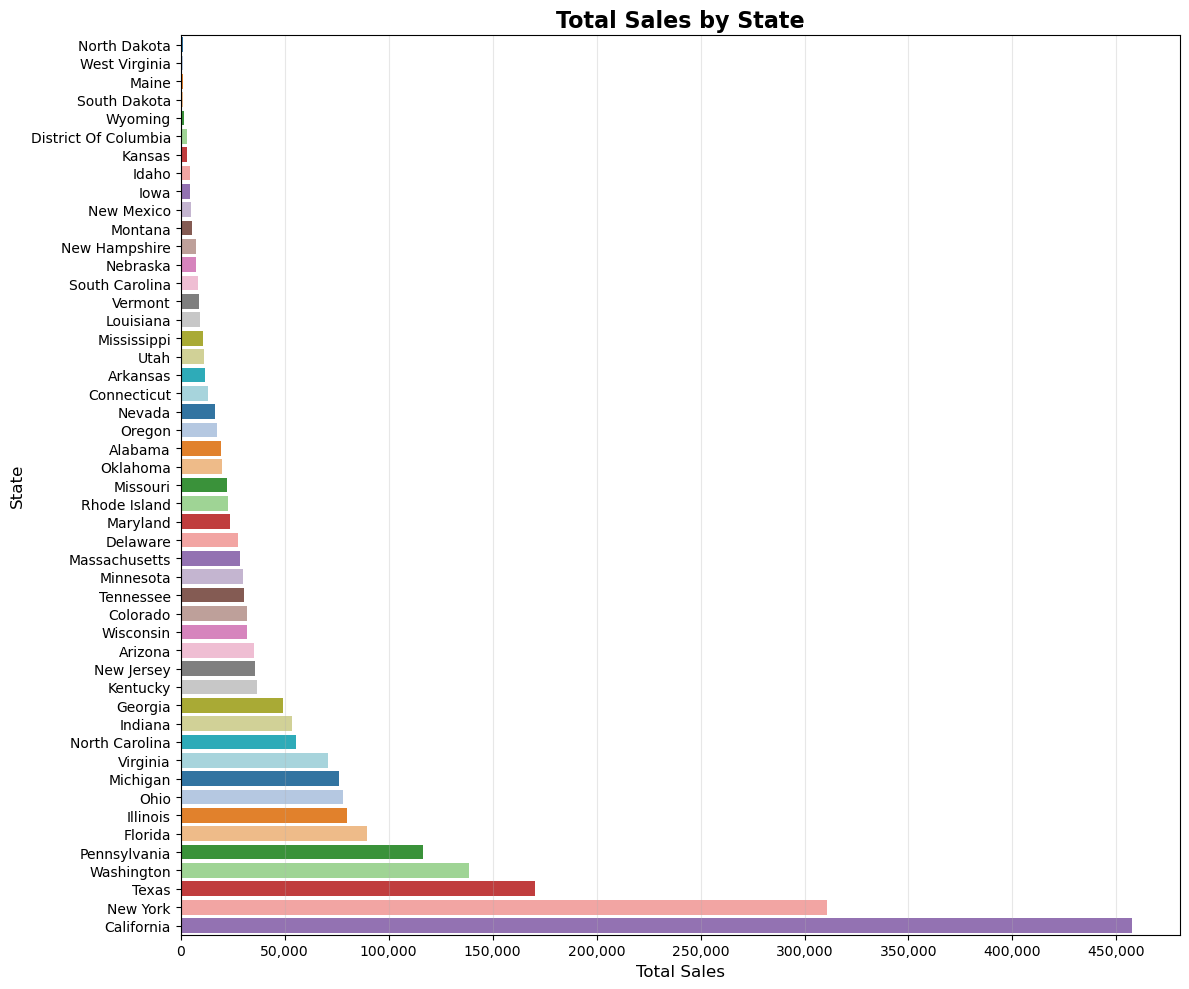

In [106]:
# === Step 1: Aggregate total sales by State ===
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales = state_sales.sort_values('Sales', ascending=True)

# === Step 2: Create horizontal bar chart ===
plt.figure(figsize=(12,10))
sns.barplot(
    data=state_sales,
    x='Sales',
    y='State',
    palette='tab20'
)

# === Step 3: Customize titles and labels ===
plt.title('Total Sales by State', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('State', fontsize=12)

# Format X-axis as integers with commas
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# Increase number of ticks on X-axis for better distribution
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))  # nbins = number of ticks you want

# Add gridlines along X-axis
plt.grid(axis='x', alpha=0.3)

# === Step 4: Save figure as PNG ===
plt.tight_layout()
plt.savefig("total_sales_by_state.png", dpi=300)

# === Step 5: Show plot ===
plt.show()

## Key Observations & Recommendations (Based on typical patterns in the dataset)

1️⃣ Focus on High-Performing Regions & States

Prioritize marketing, promotions, and inventory in California, New York, Texas, and Washington.

Replicate successful strategies from these regions elsewhere.
Icon: 🏙️

2️⃣ Boost Low-Performing Regions & States

Introduce targeted campaigns and incentives in North Dakota, Maine, West Virginia, and South region.

Localize offerings to match regional preferences.
Icon: 📢

3️⃣ Optimize Product Portfolio

Promote high-selling categories/sub-categories: Technology, Phones, Chairs.

Revitalize low-performing items: Office Supplies, Envelopes, Labels, Fasteners through bundles/discounts.
Icon: 💻

4️⃣ Enhance Customer Segment Engagement

Focus on Consumer segment with loyalty programs and personalized offers.

Increase attention to Home Office segment through targeted promotions.
Icon: 👥

5️⃣ Leverage Seasonal Sales Patterns

Plan promotions and inventory management around peak months: March, September, November.

Introduce off-season campaigns to maintain growth.
Icon: 📅

6️⃣ Use Data-Driven Forecasting for Planning

Implement predictive models (e.g., Prophet) to plan inventory, staffing, and marketing.

Monitor trends to respond proactively to demand changes.
Icon: 📈

7️⃣ Invest in Regional & Product Strategy

Expand successful West region strategies to other regions.

Focus resources on high-margin products while optimizing low-performing categories.
Icon: 🌎

8️⃣ Continuous Monitoring & Analytics

Develop a dashboard for real-time monitoring by category, segment, region, and state.

Track KPIs to adjust strategies proactively.
Icon: 🖥️